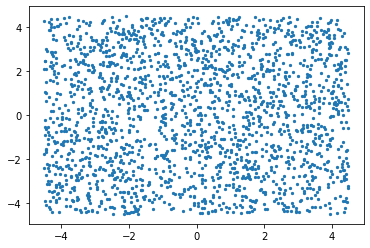

In [4]:
import numpy as np
import matplotlib.pyplot as plt


nlinear_x0 = np.empty((2000,2))
nlinear_x1 = np.empty((2000,2))


with open("nonlinear_vectorfield_data_x0.txt") as f:
    line = f.readline()
    cnt = 0
    while line:
        x01, x02 = str(line).split(" ")
        nlinear_x0[cnt, 0] = float(x01)
        nlinear_x0[cnt, 1] = float(x02)
        cnt = cnt + 1
        line = f.readline()
        
with open("nonlinear_vectorfield_data_x1.txt") as f:
    line = f.readline()
    cnt = 0
    while line:
        x11, x12 = str(line).split(" ")
        nlinear_x1[cnt, 0] = float(x11)
        nlinear_x1[cnt, 1] = float(x12)
        cnt = cnt + 1
        line = f.readline()

diff=nlinear_x1-nlinear_x0
vhat=diff/0.1

num=30
xcenter=np.linspace(-4.5,4.5,num)
ycenter=np.linspace(-4.5,4.5,num)

def phi_l(x, xc, ep):
    return np.exp(-((x[0]-xc[0])**2+(x[1]-xc[1])**2)/ep**2)

def phi_mat(xs, xcenter, ycenter, ep, num):
    result=np.empty((2000,num**2))
    for i in range(num):
        for j in range(num):
            for k in range(2000):
                result[k, num*i+j]=phi_l(xs[k], [xcenter[i],ycenter[j]], ep)
    return result

phis= phi_mat(nlinear_x0, xcenter, ycenter, 0.1, num)
C=np.linalg.lstsq(phis, vhat, rcond=None)[0]

fhat=np.dot(phis,C)
esti=np.empty((2000,2))

for i in range(2000):
    for j in range(2):
        esti[i][j]=nlinear_x0[i][j]+fhat[i][j]*0.1


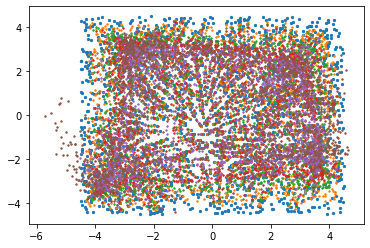

In [25]:
plt.scatter(nlinear_x0[:,0],nlinear_x0[:,1],s=5)

plt.scatter(esti[:,0], esti[:,1],s=2)

esti1=np.empty((2000,2))
for i in range(2000):
    for j in range(2):
        esti1[i][j]=nlinear_x0[i][j]+fhat[i][j]*0.2
        
plt.scatter(esti1[:,0], esti1[:,1],s=2)

esti2=np.empty((2000,2))
for i in range(2000):
    for j in range(2):
        esti2[i][j]=nlinear_x0[i][j]+fhat[i][j]*0.3
        
plt.scatter(esti2[:,0], esti2[:,1],s=2)

esti3=np.empty((2000,2))
for i in range(2000):
    for j in range(2):
        esti3[i][j]=nlinear_x0[i][j]+fhat[i][j]*0.6
        
plt.scatter(esti3[:,0], esti3[:,1],s=2)

esti4=np.empty((2000,2))
for i in range(2000):
    for j in range(2):
        esti4[i][j]=nlinear_x0[i][j]+fhat[i][j]*1
        
plt.scatter(esti4[:,0], esti4[:,1],s=2)

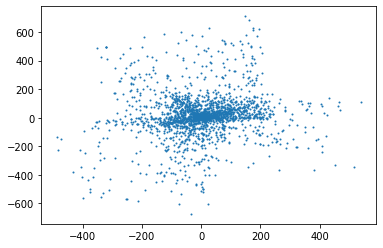

In [26]:
esti5=np.empty((2000,2))
for i in range(2000):
    for j in range(2):
        esti5[i][j]=nlinear_x0[i][j]+fhat[i][j]*100
        
plt.scatter(esti5[:,0], esti5[:,1],s=1)

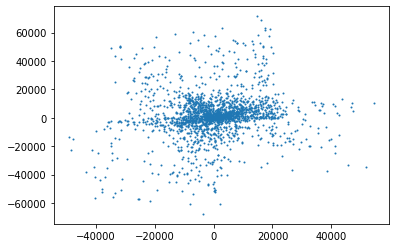

In [27]:
esti6=np.empty((2000,2))
for i in range(2000):
    for j in range(2):
        esti6[i][j]=nlinear_x0[i][j]+fhat[i][j]*10000
        
plt.scatter(esti6[:,0], esti6[:,1],s=1)

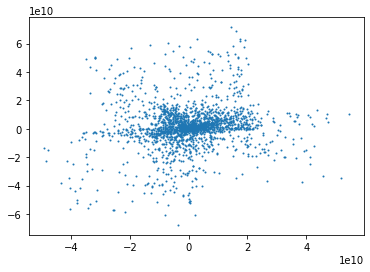

In [29]:
esti6=np.empty((2000,2))
for i in range(2000):
    for j in range(2):
        esti6[i][j]=nlinear_x0[i][j]+fhat[i][j]*10000000000
        
plt.scatter(esti6[:,0], esti6[:,1],s=1)